# Unzip the data manually or with this code

In [ ]:
!zip '/dataset/csvTrainImages 13440x1024.csv.zip'
!zip '/dataset/csvTestImages 3360x1024.csv.zip'

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Load Datasets

In [2]:
x_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv",header=None)

In [3]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

In [4]:
print('Train Data Size',x_train.shape,y_train.shape)
print('Test Data Size',x_test.shape,y_test.shape)

Train Data Size (13440, 1024) (13440, 1)
Test Data Size (3360, 1024) (3360, 1)


In [5]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)
x_train = x_train/255
x_test = x_test/255
# for some reason the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


#### 1024 pixels which mean 32 x 32

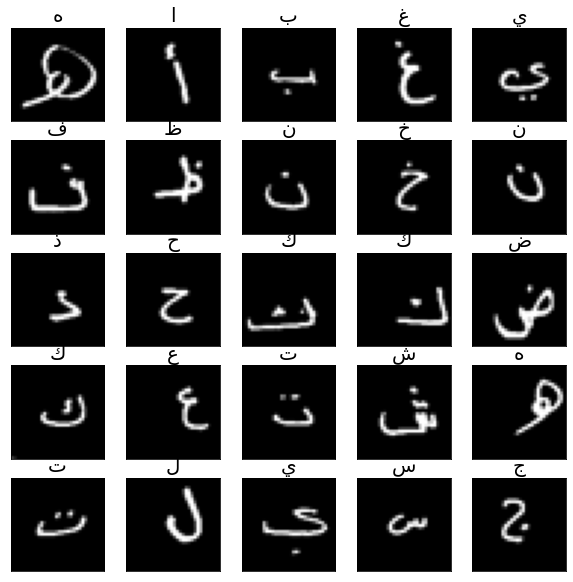

In [6]:
# set the arabic alphabet
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

In [7]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [8]:
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)

train_datagen=ImageDataGenerator(
    #rescale=1/255, # Normalize the new images
    zoom_range=0.2, #the amount of zooming u need
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
#     rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64
 
)

# Add Callbacks

In [9]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

# Build the model

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(5,5),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(28, kernel_regularizer=keras.regularizers.l2(0.01) ,activation='softmax'))

2022-08-21 03:53:30.759677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 03:53:30.871110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 03:53:30.871959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 03:53:30.873948: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 256)       6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       819328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3

In [13]:
model.fit(
    train_generator, 
    epochs=100,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/100


2022-08-21 03:53:33.630549: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-08-21 03:53:35.017894: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


210/210 [==============================] - 11s 20ms/step - loss: 2.0125 - accuracy: 0.4397 - val_loss: 0.7813 - val_accuracy: 0.7964
Epoch 2/100
210/210 [==============================] - 4s 21ms/step - loss: 1.0088 - accuracy: 0.7149 - val_loss: 0.5726 - val_accuracy: 0.8560
Epoch 3/100
210/210 [==============================] - 4s 19ms/step - loss: 0.7756 - accuracy: 0.7890 - val_loss: 0.4295 - val_accuracy: 0.8991
Epoch 4/100
210/210 [==============================] - 5s 23ms/step - loss: 0.6423 - accuracy: 0.8267 - val_loss: 0.3556 - val_accuracy: 0.9333
Epoch 5/100
210/210 [==============================] - 4s 20ms/step - loss: 0.5506 - accuracy: 0.8580 - val_loss: 0.3247 - val_accuracy: 0.9315
Epoch 6/100
210/210 [==============================] - 4s 19ms/step - loss: 0.5046 - accuracy: 0.8671 - val_loss: 0.2995 - val_accuracy: 0.9381
Epoch 7/100
210/210 [==============================] - 5s 22ms/step - loss: 0.4600 - accuracy: 0.8795 - val_loss: 0.2654 - val_accuracy: 0.9524
Epo

<AxesSubplot:>

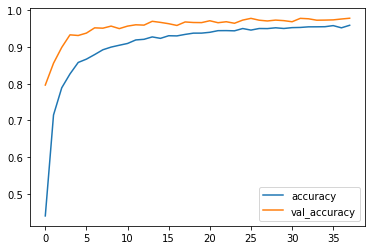

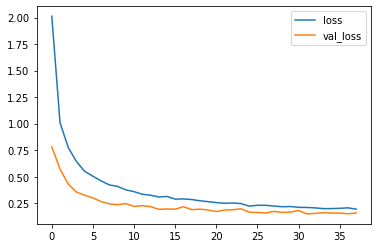

In [14]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

# Find the Accuracy of test data

In [15]:
model.evaluate(test_generator)

53/53 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9786


[0.15701395273208618, 0.9785714149475098]

In [16]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)

[ 5 23  3 ...  4 12 21]


Text(0.5, 1.0, 'ج')

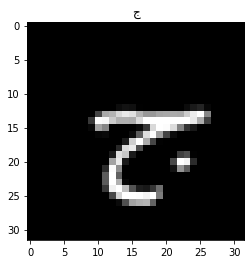

In [17]:
plt.imshow(x_test[14].reshape(32,32),"gray")
plt.title(arabic_chars[pred[14]])

# Save the model

In [18]:
model.save('arabic_alphabet_model.h5')